#   BaTcH NorMaLiZaTiOn

In [21]:
import tensorflow as tf
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
warnings.filterwarnings("ignore")

* Batch normalization (also known as batch norm) is a method used to make artificial neural networks faster and more stable through normalization of the layers' inputs by re-centering and re-scaling.It was proposed by Sergey Ioffe and Christian Szegedy in 2015.



* It consists of normalizing activation vectors from hidden layers using the first and the second statistical moments (mean and variance) of the current batch. This normalization step is applied right before (or right after) the nonlinear function.


* Batch Normalization aims to reduce internal covariate shift, and in doing so aims to accelerate the training of deep neural nets. 


* It accomplishes this via a normalization step that fixes the means and variances of layer inputs. 

* Batch Normalization also has a beneficial effect on the gradient flow through the network, by reducing the dependence of gradients on the scale of the parameters or of their initial values. 

* This allows for use of much higher learning rates without the risk of divergence. Furthermore, batch normalization regularizes the model and reduces the need for Dropout.

### Batch Normalization Enables High Learning Rate:


* In traditional deep networks, too-high learning rate ma result in the gradients that explode or vanish, as well as getting stuck in poor local minima. Batch Normalization helps address these issues. 


* By normalizing activations throughout the network, it prevents small changes to the parameters from amplifying into larger and suboptimal changes in activations in gradients; for instance, it prevents the training from getting stuck in the saturated regimes of nonlinearities


#### Batch Normalization as regualization

* Each mini batchs is scaled by the mean/variance computed on just that mini batch



* This adds some noise to the values $Z^{l}$ within that minibatch. So similar to droupout, it adds some noise to each hidden layer's activations



* This has a slight regularization effect

### internal covariate shift:

* ***We define Internal Covariate Shift as the change in the distribution of network activations due to the change in network parameters during training.*** To improve the training, we seek to reduce the internal covariate shift. 


* Suppose we are training an image classification model, that classifies the images into Dog or Not Dog. Let’s say we have the images of white dogs only, these images will have certain distribution as well. Using these images model will update its parameters.


* later, if we get a new set of images, consisting of non-white dogs. These new images will have a slightly different distribution from the previous images. Now the model will change its parameters according to these new images. Hence the distribution of the hidden activation will also change. This change in hidden activation is known as an internal covariate shift.



* By fixing the distribution of the layer inputs x as the training progresses, we expect to improve the training speed. It has been long known (LeCun et al., 1998b; Wiesler & Ney, 2011) that the network training converges faster if its inputs are whitened – i.e., linearly transformed to have zero means and unit variances, and decorrelated. 


* As each layer observes the inputs produced by the layers below, it would be advantageous to achieve the same whitening of the inputs of each layer. By whitening the inputs to each layer, we would take a step towards achieving the fixed distributions of inputs that would remove the ill effects of the internal covariate shift.



<img src="https://miro.medium.com/max/3130/1*tcvRJN-OadhUyps6HSO0og.jpeg"/>


                        Multilayer Perceptron (MLP) OR (ANN) without batch normalization (BN)
                          
                          
<img src="https://miro.medium.com/max/3130/1*QcSkw489NgtpaMuwDhehaQ.jpeg"/> 


                        Multilayer Perceptron (MLP) OR (ANN) with batch normalization (BN)
                        

### Derivation Formula:

                                                
 $$\mu \doteq \frac{1}{m}\sum_{i}Z^{(i)}                            \rightarrow  \rightarrow  \rightarrow (1)$$                                            ***m $ \rightarrow$ mini batch of data at a time*** 
                                           
 $$\sigma \doteq \frac{1}{m}\sum_{i}(Z^{(i)} - \mu )                 \rightarrow  \rightarrow  \rightarrow (2)$$                                          
 $$Z_{norm}^{i} = \frac{Z^{(i)} - \mu}{\sqrt{\sigma ^{2}-\varepsilon }}                 \rightarrow  \rightarrow  \rightarrow (3)$$
 
 $$Z= \gamma * Z_{i}^{norm} + \beta                 \rightarrow  \rightarrow  \rightarrow (4)$$ 
 
 
 
 ### Derivation with experssion:
 
 
 
$$x^{1}\xrightarrow[]{w^{1}b^{1}}Z^{1}\xrightarrow[Batch Norm]{\gamma ^{1},\beta ^{1}}Z_{Batch Norm}^{1}\rightarrow a^{1} = \sigma^{1}(Z_{Batch Norm}^{1})$$
 
 
 * (The BN layer first determines the mean 𝜇 and the standard deviation σ of the activation values across the batch, using (1) and (2).
 
 
<img src="https://miro.medium.com/max/700/1*TrjyZmHj_wInh6kFARuLZw.jpeg"/> 

                          Batch Normalization first step. Example of a 3-neurons hidden layer, 
                        with a batch of size b. Each neuron follows a standard normal distribution
                        
                        
* It finally calculates the layer’s output Ẑ(i) by applying a linear transformation with 𝛾 and 𝛽, two trainable parameters (4). Such step allows the model to choose the optimum distribution for each hidden layers, by adjusting those two parameters :


* (1) 𝛾 allows to adjust the standard deviation
* (2) 𝛽 allows to adjust the bias, shifting the curve on the right or on the left side.    

During Backprogration process calculate $\partial w$ $\partial b$ it will update wieght and bais and also calculate $\partial \gamma$ $\partial \beta$ update the value $\gamma  \beta $  
 
 
<img src="https://miro.medium.com/max/700/1*zEkSLa9rpfEmINn5DmJbOA.jpeg"/> 


                                Benefits of 𝛾 and 𝛽 parameters. Modifying the distribution 
                (on the top) allows us o use different regions of the nonlinear functions (on the bottom)
                
                
                
At each iteration, the network computes the mean 𝜇 and the standard deviation σ corresponding to the current batch. Then it trains 𝛾 and 𝛽 through gradient descent, using an [Exponential Moving Average (EMA)](https://en.wikipedia.org/wiki/Moving_average) to give more importance to the latest iterations.     


#### Exponential Weighted Moving Average (EWMA):



* The exponential moving average (EMA) is a weighted average of recent period's prices. It uses an exponentially decreasing weight from each previous price/period. In other words, the formula gives recent prices more weight than past prices



* An exponential moving average (EMA) is a type of moving average(MA) that places a greater weight and significance on the most recent data points. 



* The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period

* EWMA formula:


$$EWMA_{(t)}=  \begin{cases}
 & x_{t}  \text{ if } x= 1\\ 
 & \beta * EWMA_{(t-1)}+ (1-\beta ) * x_{(t)} \text{ if } x>1
\end{cases}$$


Where

* EWMA(t) = moving average at time t
* $\beta$ = degree of mixing parameter value between 0 and 1
* x(t) = value of signal x at time t


### In Python Implementations:


                                       *** pandas.DataFrame.ewm()***
#### Formula Explanation :


* The formula states that the value of the moving average(S) at time t is a mix between the value of raw signal(x) at time t and the previous value of the moving average itself i.e. t-1. The degree of mixing is controlled by the parameter a (value between 0–1).



* So, if a = 10%(small), most of the contribution will come from the previous value of the signal. In this case, “smoothing” will be very strong.



* if a = 90%(large), most of the contribution will come from the current value of the signal. In this case, “smoothing” will be minimum.

Data Are given below:



<img src="https://miro.medium.com/max/700/1*IL8hOsSH-lIGOC7e4joZ6g.png"/>



<img src="https://miro.medium.com/max/644/1*elAoh7SVmQpsXk6NKBfF8w.png"/>



<img src="https://miro.medium.com/max/700/1*3CB9BDosSC5loq-4cBs6CA.png"/>



<img src="https://d3i71xaburhd42.cloudfront.net/521ebc310afd88a2672f0af5f77dd4e6ec5c994f/4-Figure2-1.png"/>



* As we can see, a =10% provides really strong smoothing.




* To summarize, we have introduced EWMA and have solved a sample dataset to see how time series/sequential data is smoothed out for use in various algorithms.




### Advantages:


* BN accelerates the training of deep neural networks.


* For every input mini-batch we calculate different statistics. This introduces some sort of regularization. Regularization refers to any form of technique/constraint that restricts the complexity of a deep neural network during training.


* Every mini-batch has a different mini-distribution. We call the change between these mini-distributions Internal Covariate Shift. BN was thought to eliminate this phenomenon. Later, Santurkar et al. [7] show that this is not exactly the case why BN works.


* BN also has a beneficial effect on the gradient flow through the network. It reduces the dependence of gradients on the scale of the parameters or of their initial values. This allows us to use much higher learning rates.


* In theory, BN makes it possible to use saturating nonlinearities by preventing the network from getting stuck, but we never use these kinds of activation functions.


### Disadvantages:


* In accurate estimation of batch statistics with small batch size, which increases the model error. In tasks such as video prediction, segmentation and 3D medical image processing the batch size is usually too small. BN needs a sufficiently large batch size.



* Problems when batch size is varying. Example showcases are training VS inference, pretraining VS fine tuning, backbone architecture VS head.

# Python Implementation:

## Without Batch Normalization

In [5]:
dir(tf.keras.datasets)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'boston_housing',
 'cifar10',
 'cifar100',
 'fashion_mnist',
 'imdb',
 'mnist',
 'reuters']

In [2]:
(train_images_full,train_label_full),(test_images_full,test_label_full) = tf.keras.datasets.mnist.load_data()

In [3]:
val_train_images, train_images = train_images_full[0:5000]/255, train_images_full[5000:] /255
val_train_labels, train_labels = train_label_full[0:5000], train_label_full[5000:]
test_images_full = test_images_full/255

In [4]:
pd.DataFrame(val_train_images[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.686275,0.101961,0.650980,1.000000,0.968627,0.498039,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.117647,0.141176,...,0.882353,0.674510,0.992157,0.949020,0.764706,0.250980,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.192157,0.933333,0.992157,...,0.364706,0.321569,0.321569,0.219608,0.152941,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.070588,0.858824,0.992157,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.313725,0.611765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


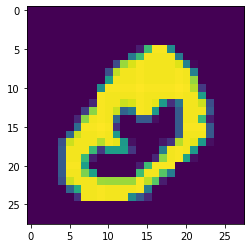

In [9]:
plt.imshow(val_train_images[np.random.randint(1,100)])

<AxesSubplot:>

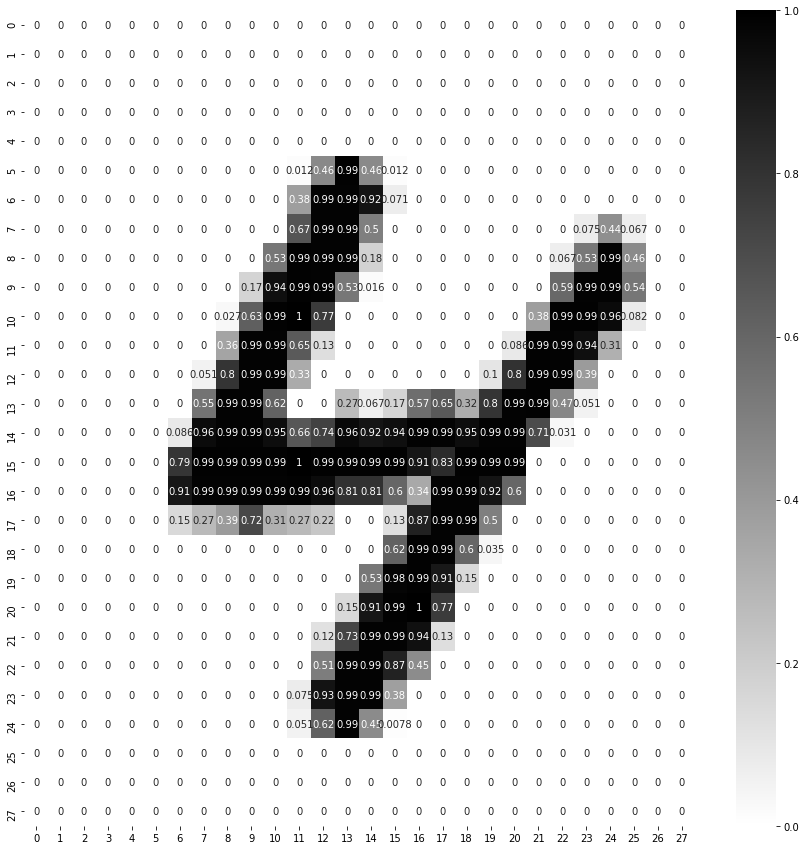

In [10]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(train_images[np.random.randint(1,100)], annot=True, cmap="binary")

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(300, use_bias=False, kernel_initializer="he_uniform"))
model.add(tf.keras.layers.LeakyReLU())
model.add(tf.keras.layers.Dense(400,activation="relu",use_bias=False, kernel_initializer="he_uniform"))
model.add(tf.keras.layers.Dense(300,activation="relu",use_bias=False, kernel_initializer="he_uniform"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [13]:
model.get_weights()

[array([[-0.03136531, -0.04631101,  0.00897852, ...,  0.06584785,
         -0.01157656, -0.01605512],
        [-0.06468298, -0.01354852, -0.05679642, ...,  0.07327094,
         -0.08619741, -0.03252584],
        [ 0.0548036 , -0.05628387, -0.06708963, ..., -0.00750487,
         -0.04065559,  0.0307832 ],
        ...,
        [ 0.07091641,  0.06021159,  0.01793941, ...,  0.03493436,
         -0.04508437,  0.00351284],
        [-0.00958763,  0.02245132, -0.03792417, ..., -0.04013227,
         -0.05362348,  0.01300228],
        [-0.06291319, -0.04319436,  0.03766923, ..., -0.02578659,
          0.06164717,  0.04421481]], dtype=float32),
 array([[-0.10963826,  0.04004034, -0.09377387, ...,  0.12278907,
         -0.01176342,  0.09515801],
        [ 0.07088166,  0.04746406,  0.06880133, ...,  0.119195  ,
          0.12326054, -0.12009792],
        [-0.05997018, -0.10594366,  0.08423732, ...,  0.12884508,
         -0.05509511, -0.0999729 ],
        ...,
        [-0.09637828, -0.05694734, -0.0

In [15]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [16]:
history1 = model.fit(train_images,train_labels,batch_size=64, epochs=50,verbose=1, validation_data=(val_train_images,val_train_labels))

Epoch 1/50
860/860 [==============================] - 19s 19ms/step - loss: 0.2122 - accuracy: 0.9349 - val_loss: 0.1049 - val_accuracy: 0.9678
Epoch 2/50
860/860 [==============================] - 16s 18ms/step - loss: 0.0958 - accuracy: 0.9705 - val_loss: 0.0844 - val_accuracy: 0.9752
Epoch 3/50
860/860 [==============================] - 17s 20ms/step - loss: 0.0678 - accuracy: 0.9785 - val_loss: 0.0874 - val_accuracy: 0.9752
Epoch 4/50
860/860 [==============================] - 17s 19ms/step - loss: 0.0547 - accuracy: 0.9818 - val_loss: 0.1005 - val_accuracy: 0.9740
Epoch 5/50
860/860 [==============================] - 16s 19ms/step - loss: 0.0446 - accuracy: 0.9859 - val_loss: 0.0681 - val_accuracy: 0.9806
Epoch 6/50
860/860 [==============================] - 16s 19ms/step - loss: 0.0405 - accuracy: 0.9865 - val_loss: 0.0880 - val_accuracy: 0.9752
Epoch 7/50
860/860 [==============================] - 16s 19ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0806 - val_accuracy:

In [17]:
(60000-5000)/64

859.375

### compare loss and val_loss Graph

<AxesSubplot:>

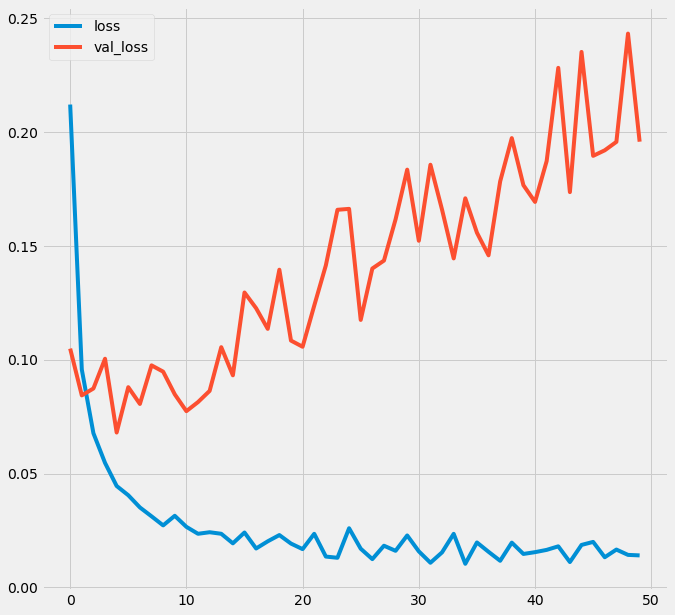

In [24]:
pd.DataFrame(history1.history,columns=["loss","val_loss"]).plot(figsize=(10,10))

### compare val_Accuracy and val_Loss Graph

<AxesSubplot:>

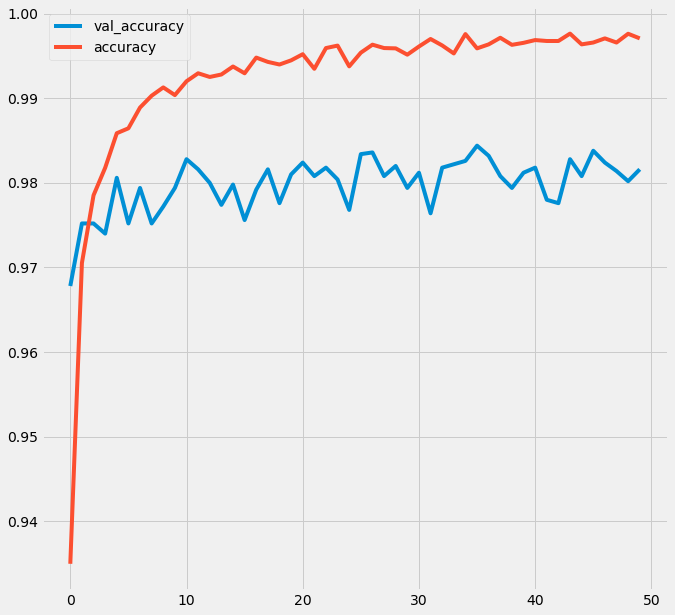

In [26]:
# print(pd.DataFrame(history1.history,columns=["val_accuracy","val_loss"]))
pd.DataFrame(history1.history,columns=["val_accuracy","accuracy"]).plot(figsize=(10,10))

In [27]:
for i,j in zip(test_label_full[0:50], model.predict(test_images_full[0:50])):
    print(f"Actual Value: {i}, Predicted Value: {np.argmax(j)}, {(i==np.argmax(j))}")

Actual Value: 7, Predicted Value: 7, True
Actual Value: 2, Predicted Value: 2, True
Actual Value: 1, Predicted Value: 1, True
Actual Value: 0, Predicted Value: 0, True
Actual Value: 4, Predicted Value: 4, True
Actual Value: 1, Predicted Value: 1, True
Actual Value: 4, Predicted Value: 4, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 5, Predicted Value: 5, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 0, Predicted Value: 0, True
Actual Value: 6, Predicted Value: 6, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 0, Predicted Value: 0, True
Actual Value: 1, Predicted Value: 1, True
Actual Value: 5, Predicted Value: 5, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 7, Predicted Value: 7, True
Actual Value: 3, Predicted Value: 3, True
Actual Value: 4, Predicted Value: 4, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 6, Predicted Value: 6, True
Actual Value: 6, Predicted Value: 6, True
Actual Value: 5, Predicted Value: 

## Obersvation:
    When I Use without use batch normalization  in our model then it is  lead to overfitting model
    
    It increase Internal Covariate Shift during training without batch normalization


# With Batch Normalization with Trainable = False

In [30]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model1.add(tf.keras.layers.BatchNormalization(trainable=False))
model1.add(tf.keras.layers.Dense(300, use_bias=False, kernel_initializer="he_uniform"))
model1.add(tf.keras.layers.LeakyReLU())
model1.add(tf.keras.layers.BatchNormalization(trainable=False))
model1.add(tf.keras.layers.Dense(400,activation="relu",use_bias=False, kernel_initializer="he_uniform"))
model1.add(tf.keras.layers.BatchNormalization(trainable=False))
model1.add(tf.keras.layers.Dense(300,activation="relu",use_bias=False, kernel_initializer="he_uniform"))
model1.add(tf.keras.layers.BatchNormalization(trainable=False))
model1.add(tf.keras.layers.Dense(10, activation="softmax"))

In [31]:
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [32]:
history2 = model1.fit(train_images,train_labels,batch_size=64, epochs=50,verbose=1, validation_data=(val_train_images,val_train_labels))

Epoch 1/50
860/860 [==============================] - 21s 20ms/step - loss: 0.2118 - accuracy: 0.9366 - val_loss: 0.1226 - val_accuracy: 0.9640
Epoch 2/50
860/860 [==============================] - 17s 20ms/step - loss: 0.0959 - accuracy: 0.9705 - val_loss: 0.0954 - val_accuracy: 0.9714
Epoch 3/50
860/860 [==============================] - 18s 21ms/step - loss: 0.0664 - accuracy: 0.9785 - val_loss: 0.0886 - val_accuracy: 0.9772
Epoch 4/50
860/860 [==============================] - 18s 21ms/step - loss: 0.0555 - accuracy: 0.9825 - val_loss: 0.0983 - val_accuracy: 0.9710
Epoch 5/50
860/860 [==============================] - 18s 20ms/step - loss: 0.0465 - accuracy: 0.9851 - val_loss: 0.0835 - val_accuracy: 0.9772
Epoch 6/50
860/860 [==============================] - 17s 20ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.0795 - val_accuracy: 0.9782
Epoch 7/50
860/860 [==============================] - 18s 20ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0977 - val_accuracy:

<AxesSubplot:>

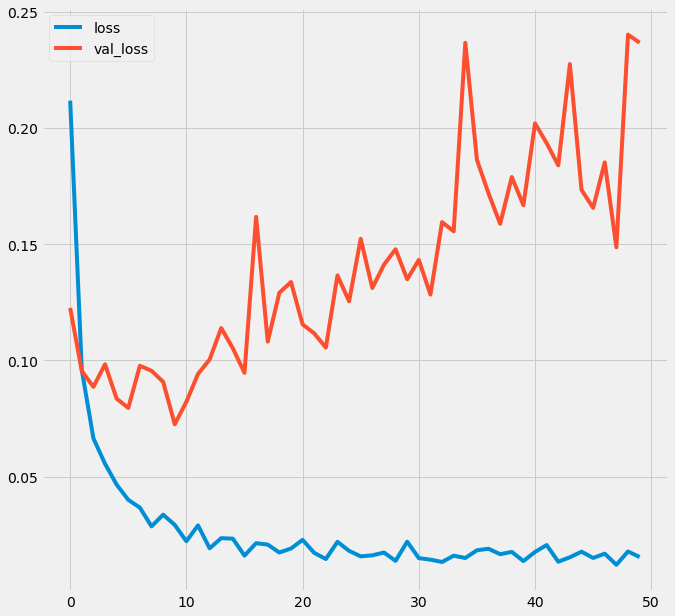

In [34]:
# print(pd.DataFrame(history2.history,columns=["loss","val_loss"]))
pd.DataFrame(history2.history,columns=["loss","val_loss"]).plot(figsize=(10,10))

<AxesSubplot:>

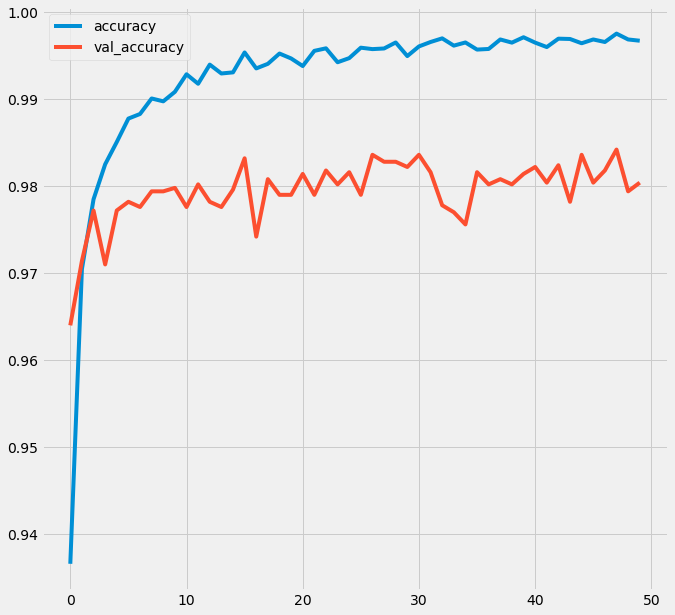

In [35]:
# print(pd.DataFrame(history2.history,columns=["accuracy","val_accuracy"]))

pd.DataFrame(history2.history,columns=["accuracy","val_accuracy"]).plot(figsize=(10,10))

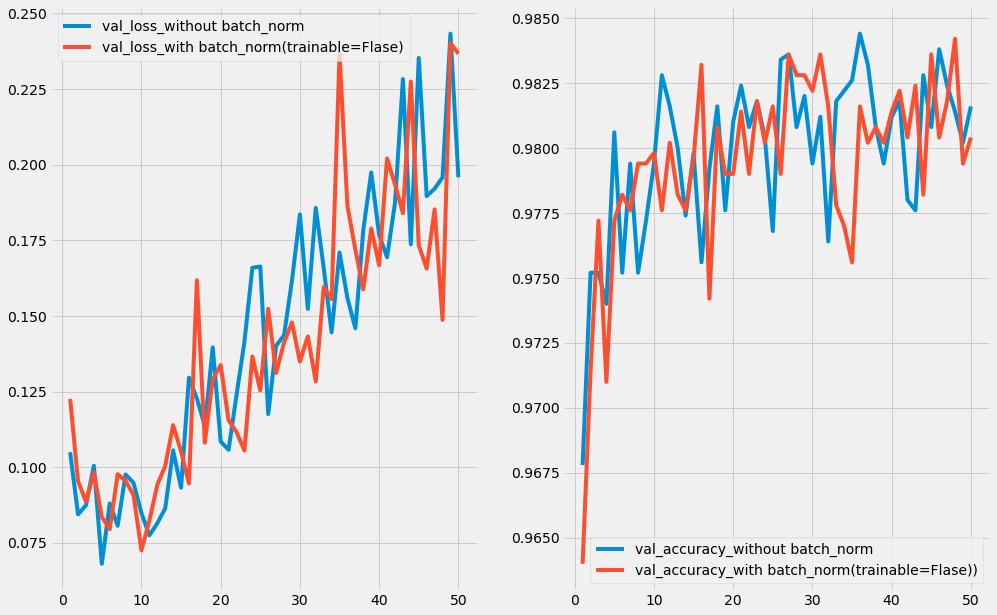

In [47]:
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),history1.history['val_loss'],label="val_loss_without batch_norm")
plt.plot(np.arange(1,51),history2.history['val_loss'],label="val_loss_with batch_norm(trainable=Flase)")
plt.legend()
plt.subplot(1,2,2)
plt.plot(np.arange(1,51),history1.history['val_accuracy'],label="val_accuracy_without batch_norm")
plt.plot(np.arange(1,51),history2.history['val_accuracy'],label="val_accuracy_with batch_norm(trainable=Flase))")
plt.legend()

In [36]:
for i,j in zip(test_label_full[0:50], model1.predict(test_images_full[0:50])):
    print(f"Actual Value: {i}, Predicted Value: {np.argmax(j)}, {i==np.argmax(j)}")

Actual Value: 7, Predicted Value: 7, True
Actual Value: 2, Predicted Value: 2, True
Actual Value: 1, Predicted Value: 1, True
Actual Value: 0, Predicted Value: 0, True
Actual Value: 4, Predicted Value: 4, True
Actual Value: 1, Predicted Value: 1, True
Actual Value: 4, Predicted Value: 4, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 5, Predicted Value: 5, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 0, Predicted Value: 0, True
Actual Value: 6, Predicted Value: 6, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 0, Predicted Value: 0, True
Actual Value: 1, Predicted Value: 1, True
Actual Value: 5, Predicted Value: 5, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 7, Predicted Value: 7, True
Actual Value: 3, Predicted Value: 3, True
Actual Value: 4, Predicted Value: 4, True
Actual Value: 9, Predicted Value: 9, True
Actual Value: 6, Predicted Value: 6, True
Actual Value: 6, Predicted Value: 6, True
Actual Value: 5, Predicted Value: 

## Observation:

    When I use model with btach_normalization & trainable = False is same problem to without batch_normalization model. SO also this is overfitting model

# With Batch Normalization with Trainable = True

In [49]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(300, use_bias=False, kernel_initializer="he_uniform"))
model2.add(tf.keras.layers.LeakyReLU())
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(400,activation="relu",use_bias=False, kernel_initializer="he_uniform"))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(300,activation="relu",use_bias=False, kernel_initializer="he_uniform"))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

In [51]:
model2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

In [52]:
history3 = model2.fit(train_images,train_labels,batch_size=64, epochs=50,verbose=1, validation_data=(val_train_images,val_train_labels))

Epoch 1/50
860/860 [==============================] - 27s 27ms/step - loss: 0.2023 - accuracy: 0.9368 - val_loss: 0.1082 - val_accuracy: 0.9714
Epoch 2/50
860/860 [==============================] - 23s 26ms/step - loss: 0.0964 - accuracy: 0.9690 - val_loss: 0.1032 - val_accuracy: 0.9710
Epoch 3/50
860/860 [==============================] - 24s 28ms/step - loss: 0.0720 - accuracy: 0.9768 - val_loss: 0.0956 - val_accuracy: 0.9734
Epoch 4/50
860/860 [==============================] - 21s 25ms/step - loss: 0.0608 - accuracy: 0.9800 - val_loss: 0.0909 - val_accuracy: 0.9750
Epoch 5/50
860/860 [==============================] - 19s 23ms/step - loss: 0.0488 - accuracy: 0.9835 - val_loss: 0.0905 - val_accuracy: 0.9750
Epoch 6/50
860/860 [==============================] - 21s 24ms/step - loss: 0.0432 - accuracy: 0.9854 - val_loss: 0.0872 - val_accuracy: 0.9778
Epoch 7/50
860/860 [==============================] - 20s 24ms/step - loss: 0.0348 - accuracy: 0.9884 - val_loss: 0.0972 - val_accuracy:

<AxesSubplot:>

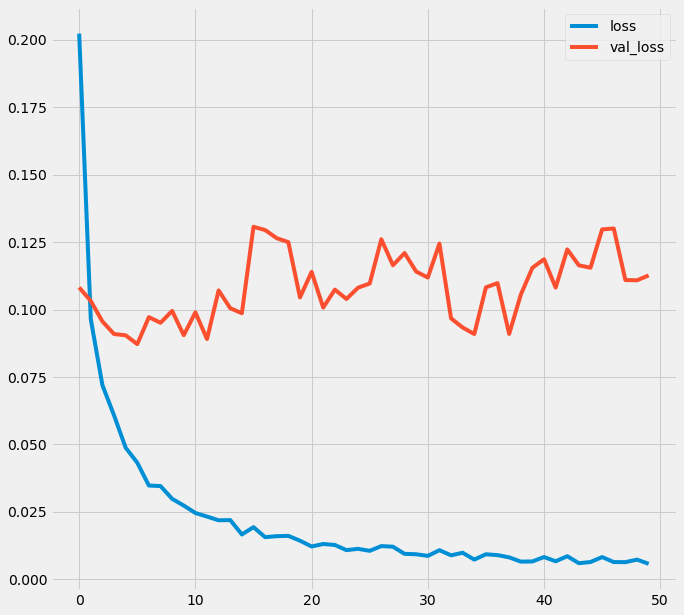

In [54]:
# print(pd.DataFrame(history3.history,columns=["loss","accuracy"]))
pd.DataFrame(history3.history,columns=["loss","val_loss"]).plot(figsize=(10,10))

<AxesSubplot:>

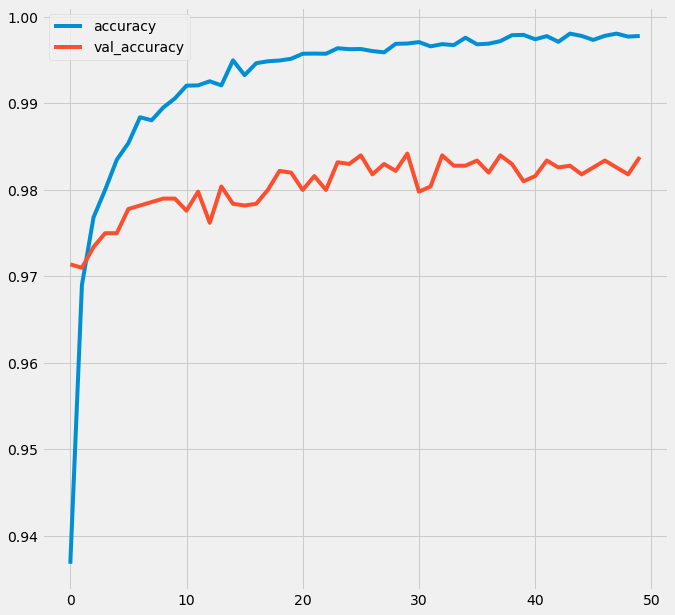

In [55]:
# print(pd.DataFrame(history3.history,columns=["val_loss","val_accuracy"]))
pd.DataFrame(history3.history,columns=["accuracy","val_accuracy"]).plot(figsize=(10,10))

## Obersvation:

    when I use model with bacth normalization is regularzies the model but it is not generalizes the model

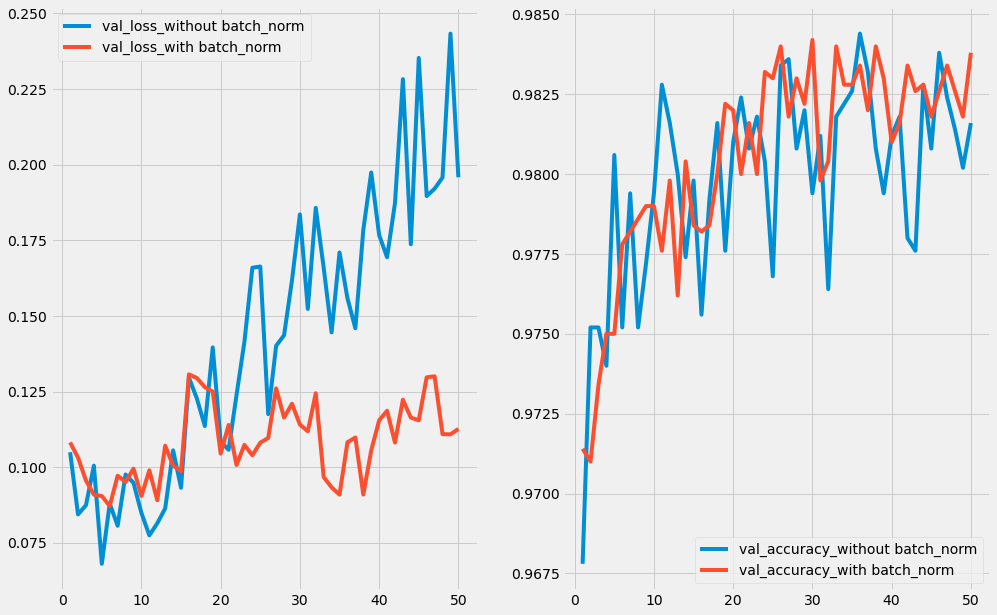

In [57]:
plt.subplots(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(np.arange(1,51),history1.history['val_loss'],label="val_loss_without batch_norm")
plt.plot(np.arange(1,51),history3.history['val_loss'],label="val_loss_with batch_norm")
plt.legend()
plt.subplot(1,2,2)
plt.plot(np.arange(1,51),history1.history['val_accuracy'],label="val_accuracy_without batch_norm")
plt.plot(np.arange(1,51),history3.history['val_accuracy'],label="val_accuracy_with batch_norm")
plt.legend()

## Observation:

* I using with batch normalization is slightly regularzies than without batch normalization

        
* It normalize the inputs certain the range

        
* Batch Normalization using exponential wieghted average is used past gradient to pass the present gradient and use it

In [58]:
for i,j in zip(test_label_full[0:50], model2.predict(test_images_full[0:50])):
    print(f"Actual Value: {i}, Predicted Value: {np.argmax(j)},{i == np.argmax(j)}")

Actual Value: 7, Predicted Value: 7,True
Actual Value: 2, Predicted Value: 2,True
Actual Value: 1, Predicted Value: 1,True
Actual Value: 0, Predicted Value: 0,True
Actual Value: 4, Predicted Value: 4,True
Actual Value: 1, Predicted Value: 1,True
Actual Value: 4, Predicted Value: 4,True
Actual Value: 9, Predicted Value: 9,True
Actual Value: 5, Predicted Value: 5,True
Actual Value: 9, Predicted Value: 9,True
Actual Value: 0, Predicted Value: 0,True
Actual Value: 6, Predicted Value: 6,True
Actual Value: 9, Predicted Value: 9,True
Actual Value: 0, Predicted Value: 0,True
Actual Value: 1, Predicted Value: 1,True
Actual Value: 5, Predicted Value: 5,True
Actual Value: 9, Predicted Value: 9,True
Actual Value: 7, Predicted Value: 7,True
Actual Value: 3, Predicted Value: 3,True
Actual Value: 4, Predicted Value: 4,True
Actual Value: 9, Predicted Value: 9,True
Actual Value: 6, Predicted Value: 6,True
Actual Value: 6, Predicted Value: 6,True
Actual Value: 5, Predicted Value: 5,True
Actual Value: 4,

### Conculsion:


* First I Train the model without batch normalization  accuracy is 0.9771 and val_accuracy is 0.9816


* Second I Train the model with batch normalization(trainable=False)  accuracy is 0.9967  and val_accuracy is 0.9804


* Second I Train the model with batch normalization(trainable=True)  accuracy is 0.9978 and val_accuracy is 0.9838

